
### Delving into Sentiment on YouTube: Fine-tuning DistilBERT for Binary Classification
This project explores the intriguing realm of sentiment analysis on YouTube comments. Our aim is to train a DistilBERT model on a curated dataset of labeled tweets from Hugging Face contributors, and then test its ability to discern positive and negative sentiments within the vibrant ecosystem of YouTube comments.

By leveraging the efficiency and pre-trained knowledge of DistilBERT, we seek to tackle the challenge of limited labeled data, a common hurdle in sentiment analysis projects. Utilizing this smaller model allows us to train effectively with the available tweet dataset and potentially generalize this ability to the diverse and often informal language of YouTube comments.

This project holds the potential to unlock exciting possibilities. Imagine a tool that can automatically analyze the sentiment of YouTube comments, providing valuable insights into audience reactions, brand perception, or even emerging trends. By pushing the boundaries of sentiment analysis on social media platforms, we hope to gain deeper understanding of online communication and contribute to enriching the digital landscape.

In [36]:
import pandas as pd
import numpy as np
import datasets
from datasets import load_dataset
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [3]:
dataset = load_dataset("LYTinn/sentiment-analysis-tweet")

Generating train split: 10000 examples [00:00, 285629.92 examples/s]
Generating test split: 4913 examples [00:00, 446571.94 examples/s]


In [10]:
combined_data = []
for split in dataset:
    for row in dataset[split]:
        tweet, label = row["tweet"], row["label"]
        combined_data.append((tweet, label))

df = pd.DataFrame(combined_data, columns=["tweet", "label"])

In [24]:
df_binary = df[df["label"] != 0]

label_counts_binary = df_binary["label"].value_counts()
print(label_counts_binary)

label
 1    3809
-1    3691
Name: count, dtype: int64


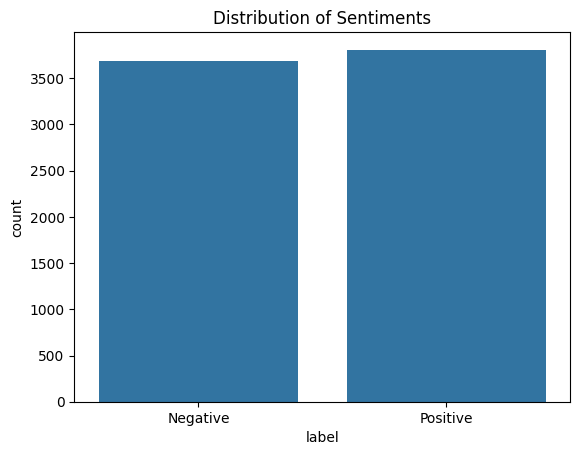

In [33]:
sns.countplot(x='label', data=df_binary)
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])

plt.title('Distribution of Sentiments')
plt.show()

C:\Users\afise\AppData\Local\Temp\ipykernel_26376\2012831957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary['tweet_length'] = df_binary['tweet'].apply(len)


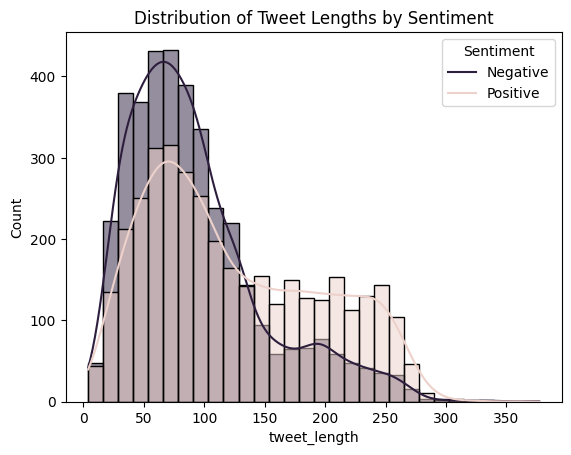

In [30]:
df_binary['tweet_length'] = df_binary['tweet'].apply(len)
sns.histplot(data=df_binary, x='tweet_length', hue='label', bins=30, kde=True)

plt.legend(title='Sentiment', labels=['Negative', 'Positive'])

plt.title('Distribution of Tweet Lengths by Sentiment')
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\afise\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\afise\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
C:\Users\afise\AppData\Local\Temp\ipykernel_26376\155643895.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary['processed_tweet'] = df_binary['tweet'].apply(preprocess_text)


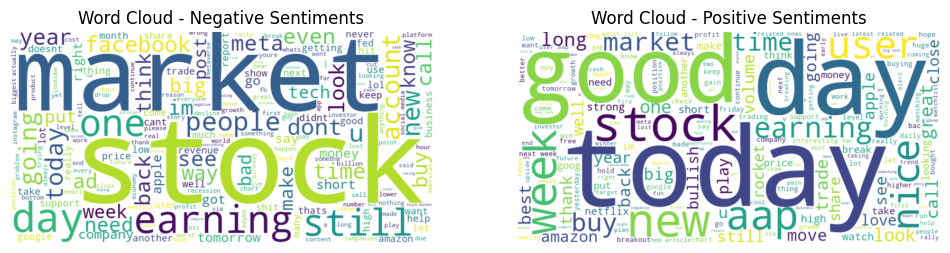

In [38]:
nltk.data.path.append("C:/Users/afise/Documents/GitHub/YoutubeCommentClassification")

try:
    nltk.data.find('corpora/stopwords.zip')
except LookupError:
    nltk.download('stopwords')

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    return ' '.join(tokens)

df_binary['processed_tweet'] = df_binary['tweet'].apply(preprocess_text)

positive_tweets = ' '.join(df_binary[df_binary['label'] == 1]['processed_tweet'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)

negative_tweets = ' '.join(df_binary[df_binary['label'] == -1]['processed_tweet'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud - Negative Sentiments')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud - Positive Sentiments')
plt.axis('off')

plt.show()